<a href="https://colab.research.google.com/github/poojaanbu0/mnist-classification/blob/main/dl_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image= X_train[0]

In [5]:
single_image.shape

(28, 28)

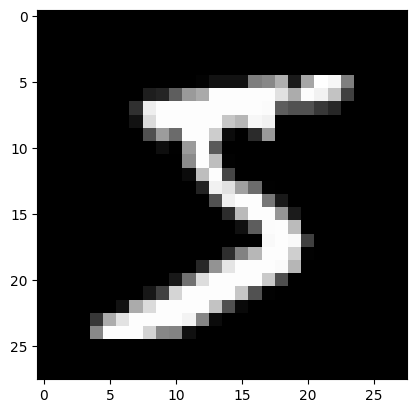

In [6]:
plt.imshow(single_image,cmap='gray')

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.min()


0

In [9]:
X_train.max()

255

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()

0.0

In [12]:
X_train_scaled.max()

1.0

In [13]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape

(60000, 10)

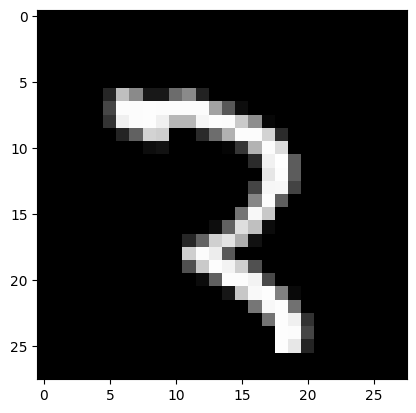

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [49]:
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [51]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [52]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 55s 57ms/step - loss: 0.1808 - accuracy: 0.9440 - val_loss: 0.0448 - val_accuracy: 0.9848
Epoch 2/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0333 - val_accuracy: 0.9889
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.0305 - val_accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0330 - val_accuracy: 0.9901
Epoch 5/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0354 - val_accuracy: 0.9888


In [53]:
metrics = pd.DataFrame(model.history.history)

In [54]:
print("Pooja A")
print("212222240072")
metrics.head()

Pooja A
212222240072


,loss,accuracy,val_loss,val_accuracy
0,0.180843,0.943967,0.044825,0.9848
1,0.051766,0.983717,0.033341,0.9889
2,0.035894,0.989217,0.030466,0.9898
3,0.027353,0.991367,0.032961,0.9901
4,0.023685,0.992617,0.035370,0.9888


Pooja A
212222240072


<Axes: >

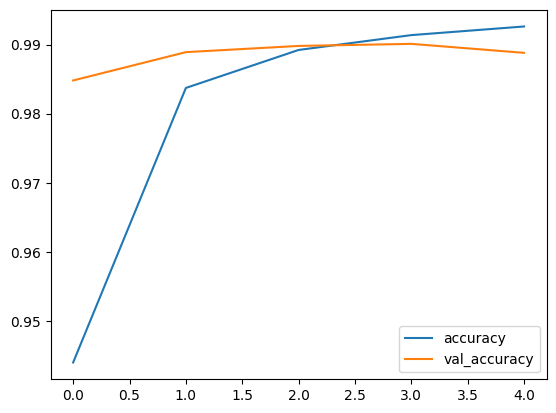

In [55]:
print("Pooja A")
print("212222240072")
metrics[['accuracy','val_accuracy']].plot()

Pooja A
212222240072


<Axes: >

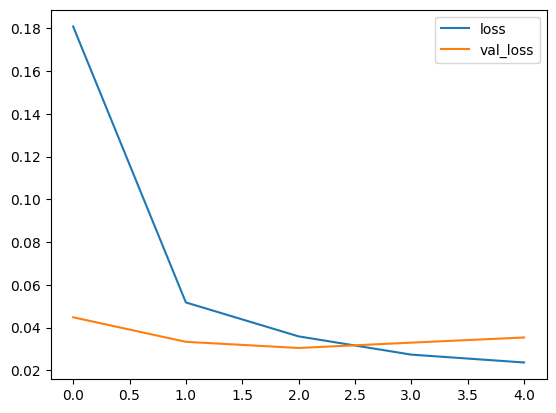

In [56]:
print("Pooja A")
print("212222240072")
metrics[['loss','val_loss']].plot()

In [57]:
print("Pooja A")
print("212222240072")
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

Pooja A
212222240072
313/313 [==============================] - 4s 12ms/step


In [58]:
print("Pooja A")
print("212222240072")
print(confusion_matrix(y_test,x_test_predictions))

Pooja A
212222240072
[[ 970    0    1    0    0    1    2    3    2    1]
 [   0 1122    1    6    0    0    2    3    1    0]
 [   0    0 1027    0    0    0    0    5    0    0]
 [   0    0    1 1006    0    1    0    2    0    0]
 [   0    0    0    0  967    0    1    0    1   13]
 [   0    0    0   10    0  881    1    0    0    0]
 [   1    2    0    1    0    6  945    0    3    0]
 [   0    2    6    0    0    0    0 1019    0    1]
 [   1    0    3    6    0    1    0    3  956    4]
 [   0    0    0    3    1    5    0    1    4  995]]


In [59]:
print("Pooja A")
print("212222240072")
print(classification_report(y_test,x_test_predictions))


Pooja A
212222240072
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.97      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [60]:
img = image.load_img('/content/images.png')


In [61]:
type(img)

PIL.Image.Image

In [62]:
img = image.load_img('/content/images.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [63]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 38ms/step


In [64]:
print(x_single_prediction)

[5]


Pooja A
212222240072


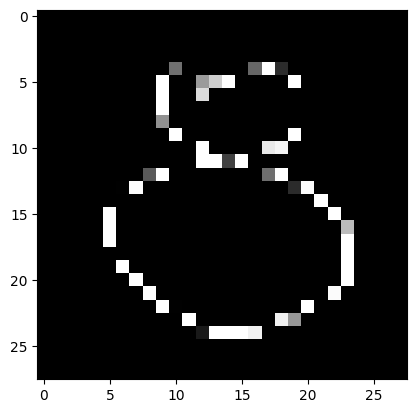

In [65]:
print("Pooja A")
print("212222240072")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [66]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [67]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 21ms/step


In [68]:
print("Pooja A")
print("212222240082")
print(x_single_prediction)

Pooja A
212222240082
[8]
